WeatherPy Assignment
The observed trends are
1.Temperature is high near the equator and decreases in going away from the equator.
2.High humidity is observed near the equator
3.Cloudiness seems uniform all over the globe

In [1]:
# Dependencies
import csv
import random
import matplotlib.pyplot as plt
import requests
import pandas as pd
from weather_config import api_key
from citipy import citipy

In [5]:
#Generating latitude(-90,90) and longitude(_180,180)
def city_generator(cities, countries):
    '''
    Returns a list of randomly generated lat, lng coordinates of the closest city
    '''
    lat, lng = random.uniform(-90, 90), random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    city_name = city.city_name.title()
    country = city.country_code
    
    if city_name in cities and country in countries:
        city_detail = city_generator(cities, countries)[2]
    else:
        city_detail = city_name+','+country
        
    return [lat, lng, city_detail]

In [8]:
#request current weather
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#set up number of cities to query
record = 1
Total_cities = 600

#Initiating lists for storing results

cities = []
countries = []
lat = []
lon = []
Temperature = []
humidity = []
cloudiness = []
windSpeed =[]


while record <= Total_cities:
    
    #generate random city
    city_list = city_generator(cities, countries)
    print(f' Processing for city # {record}:{city_list[2]}\n Requested: {query_url}{city_list[2]}' )
    
    r = requests.get(query_url + city_list[2])
    
    if r.status_code == 200:
        response = r.json()
        #pprint(response)
        try:
            city = response['name']
            country = response['sys']['country']
            #To Check if city is unique
            if  city in cities and country in countries:
                print(f'   {city}, {country} has already been added, attempting with another city\n')
            else:
                print('   recording weather for ' f'{city}, {country}' '\n')
                
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                Temperature.append(response['main']['temp'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['clouds']['all'])
                windSpeed.append(response['wind']['speed'])
                cities.append(city)
                countries.append(country)
                record += 1
        except KeyError:
            print('Key is not found')
    elif r.status_code == 404:
        print('   city not found, retrying with different city... \n')
        
print( f'Requested for {len(cities)} cities.' )


 Processing for city # 1:Katsuura,jp
 Requested: http://api.openweathermap.org/data/2.5/weather?appid=73826dff6d2151f8356b24df7781d600&units=imperial&q=Katsuura,jp
   recording weather for Katsuura, JP

 Processing for city # 2:Port Alfred,za
 Requested: http://api.openweathermap.org/data/2.5/weather?appid=73826dff6d2151f8356b24df7781d600&units=imperial&q=Port Alfred,za
   recording weather for Port Alfred, ZA

 Processing for city # 3:Airai,pw
 Requested: http://api.openweathermap.org/data/2.5/weather?appid=73826dff6d2151f8356b24df7781d600&units=imperial&q=Airai,pw
   city not found, retrying with different city... 

 Processing for city # 3:Ushuaia,ar
 Requested: http://api.openweathermap.org/data/2.5/weather?appid=73826dff6d2151f8356b24df7781d600&units=imperial&q=Ushuaia,ar
   recording weather for Ushuaia, AR

 Processing for city # 4:Pangnirtung,ca
 Requested: http://api.openweathermap.org/data/2.5/weather?appid=73826dff6d2151f8356b24df7781d600&units=imperial&q=Pangnirtung,ca
   r

In [20]:
#creating Data frame
weather_dict = {
    'City':cities,
    'Country':countries,
    'Latitude':lat,
    'Longitude':lon,
    'Temperature(F)':Temperature,
    'Humidity':humidity,
    'WindSpeed (MPH)':windSpeed,
    'Cloudiness':cloudiness
}
cities_weather = pd.DataFrame(weather_dict,columns=pd.Index(["City","Country","Latitude",
                                                             "Longitude","Temperature(F)","Humidity","WindSpeed (MPH)","Cloudiness"]))


In [21]:
cities_weather.head()

,City,Country,Latitude,Longitude,Temperature(F),Humidity,WindSpeed (MPH),Cloudiness
0,Katsuura,JP,33.93,134.50,49.70,84,1.70,0
1,Port Alfred,ZA,-33.59,26.89,68.78,98,3.04,44
2,Ushuaia,AR,-54.81,-68.31,44.60,87,6.93,40
3,Pangnirtung,CA,66.15,-65.72,32.00,82,10.29,75
4,Busselton,AU,-33.64,115.35,63.56,100,16.69,24


In [58]:
cities_weather.to_csv("cities_weather.csv")

### plotting latitude Vs Temperature

In [22]:
#x,y values for the plot
lat=cities_weather["Latitude"]
Temp= cities_weather["Temperature(F)"]

In [35]:
plt.scatter(Temp,lat)

In [36]:
plt.xlabel="Temperature(F)"
plt.ylabel="Latitude"

In [37]:
plt.grid()

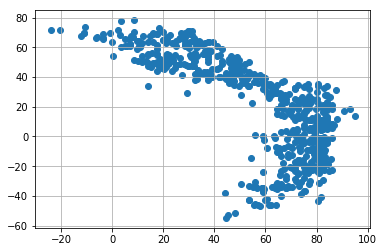

In [38]:
plt.show()

### plotting latitude Vs Humidity

In [39]:
#Assigning humidity
humidity=cities_weather["Humidity"]

In [41]:
plt.scatter(humidity,lat)

In [43]:
plt.grid()

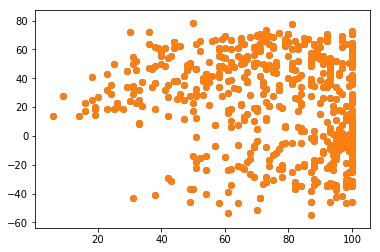

In [44]:
plt.show()

### plotting latitude Vs windSpeed

In [48]:
windspeed=cities_weather["WindSpeed (MPH)"]

In [49]:
plt.scatter(windspeed,lat)

In [51]:
plt.grid()

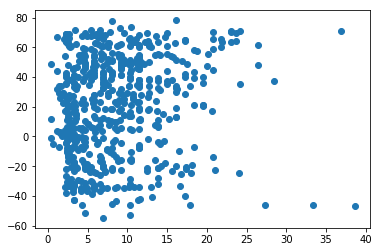

In [52]:
plt.show()

### plotting latitude Vs Cloudiness

In [53]:
cloudiness= cities_weather["Cloudiness"]

In [54]:
plt.scatter(lat,cloudiness)

In [56]:
plt.grid()

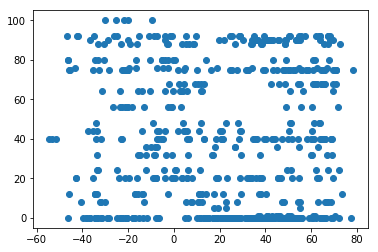

In [57]:
plt.show()